## 5.4A
Kies op Kaggle.com (of elders op het Internet) een dataset uit die je interessant vindt en die niet gebruikt wordt in het ZTDL-notebook.

### Antwoord
- Ik heb een obesity data set gevonden op kaggel.com [dataset](https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels/data).

## 5.4B
Formuleer je eigen classificatie vraagstuk. Je mag het eenvoudig houden. Het gaat er hierom dat je een keer zelf het traject hebt doorlopen met een eigen dataset

### Antwoord
- Mijn neural network moet mensen classificeren in verschillende obesity levels.

## 5.4C
Voer een dataexploratie en visualisatie uit zodat je verstand krijgt van de dataset. Je mag hierbij code van elders copy-pasten(!) als je de bron erbij vermeld. In deze module gaat het niet om leren Phyton programmeren maar om het oplossen van een (eenvoudig) classificatie vraagstuk

### Antwoord
- Zie onderstaande code

## 5.4D
Stel een neuraal netwerk op entrain deze met de dataset

### Antwoord
- Zie onderstaande code

## 5.4E
Test het resultaat.

### Antwoord
- Zie onderstaande code

## 5.4F
Wat is je conclusie?

### Antwoord
- De neural network kan obesity levels classifyen met een accuracy van 0.1640

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
data = pd.read_csv('../data/obesity_data_set.csv')

In [3]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [4]:
numerical_columns = ['Age', 'Height', 'Weight', 'CH2O', 'FAF', 'TUE']

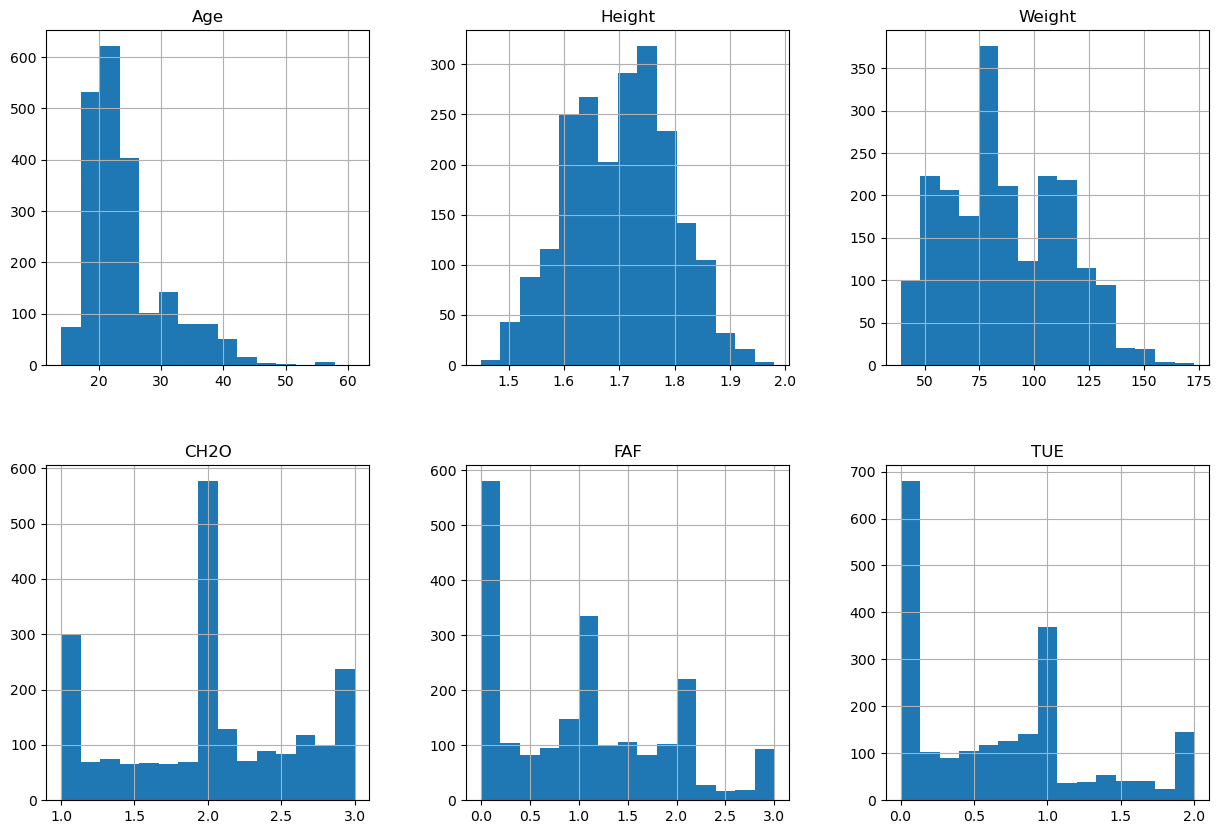

In [5]:
data[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.show()

C:\Users\Moustapha\anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


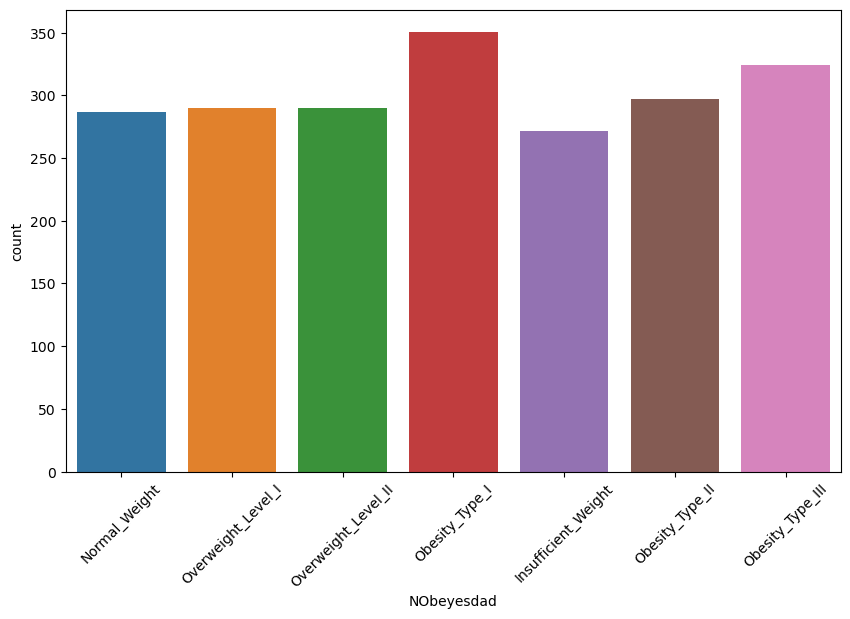

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data['NObeyesdad'])
plt.xticks(rotation=45)
plt.show()

In [7]:
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

X = data[['Age', 'Height', 'Weight', 'CH2O', 'FAF', 'TUE']]
y = data['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(data['NObeyesdad'].unique()), activation='softmax'))

In [10]:
optimizer = Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(X_train_scaled, y_train, epochs=250, validation_data=(X_test_scaled, y_test))

Epoch 1/250
47/47 [==============================] - 1s 6ms/step - loss: 1.8692 - accuracy: 0.2613 - val_loss: 1.5200 - val_accuracy: 0.2950
Epoch 2/250
47/47 [==============================] - 0s 3ms/step - loss: 1.7565 - accuracy: 0.2708 - val_loss: 1.4843 - val_accuracy: 0.3170
Epoch 3/250
47/47 [==============================] - 0s 2ms/step - loss: 1.9116 - accuracy: 0.2343 - val_loss: 1.6096 - val_accuracy: 0.3107
Epoch 4/250
47/47 [==============================] - 0s 3ms/step - loss: 1.7929 - accuracy: 0.2343 - val_loss: 1.6297 - val_accuracy: 0.3076
Epoch 5/250
47/47 [==============================] - 0s 2ms/step - loss: 1.8301 - accuracy: 0.2498 - val_loss: 1.5727 - val_accuracy: 0.3170
Epoch 6/250
47/47 [==============================] - 0s 2ms/step - loss: 1.9702 - accuracy: 0.1781 - val_loss: 1.8032 - val_accuracy: 0.2476
Epoch 7/250
47/47 [==============================] - 0s 2ms/step - loss: 1.9154 - accuracy: 0.1801 - val_loss: 1.6264 - val_accuracy: 0.3202
Epoch 8/250
4

Epoch 59/250
47/47 [==============================] - 0s 2ms/step - loss: 1.9563 - accuracy: 0.1462 - val_loss: 1.9518 - val_accuracy: 0.1293
Epoch 60/250
47/47 [==============================] - 0s 2ms/step - loss: 1.9589 - accuracy: 0.1666 - val_loss: 1.9555 - val_accuracy: 0.1640
Epoch 61/250
47/47 [==============================] - 0s 2ms/step - loss: 1.9538 - accuracy: 0.1503 - val_loss: 1.9467 - val_accuracy: 0.1640
Epoch 62/250
47/47 [==============================] - 0s 2ms/step - loss: 1.9572 - accuracy: 0.1442 - val_loss: 1.9482 - val_accuracy: 0.1215
Epoch 63/250
47/47 [==============================] - 0s 2ms/step - loss: 1.9527 - accuracy: 0.1625 - val_loss: 1.9553 - val_accuracy: 0.1293
Epoch 64/250
47/47 [==============================] - 0s 3ms/step - loss: 1.9545 - accuracy: 0.1415 - val_loss: 1.9628 - val_accuracy: 0.1293
Epoch 65/250
47/47 [==============================] - 0s 2ms/step - loss: 1.9554 - accuracy: 0.1469 - val_loss: 1.9503 - val_accuracy: 0.1640
Epoch 

47/47 [==============================] - 0s 2ms/step - loss: 1.9637 - accuracy: 0.1415 - val_loss: 1.9507 - val_accuracy: 0.1309
Epoch 117/250
47/47 [==============================] - 0s 2ms/step - loss: 1.9507 - accuracy: 0.1645 - val_loss: 1.9427 - val_accuracy: 0.1625
Epoch 118/250
47/47 [==============================] - 0s 2ms/step - loss: 1.9537 - accuracy: 0.1273 - val_loss: 1.9496 - val_accuracy: 0.1562
Epoch 119/250
47/47 [==============================] - 0s 2ms/step - loss: 1.9508 - accuracy: 0.1571 - val_loss: 1.9520 - val_accuracy: 0.1562
Epoch 120/250
47/47 [==============================] - 0s 2ms/step - loss: 1.9518 - accuracy: 0.1462 - val_loss: 1.9599 - val_accuracy: 0.1562
Epoch 121/250
47/47 [==============================] - 0s 2ms/step - loss: 1.9495 - accuracy: 0.1618 - val_loss: 1.9541 - val_accuracy: 0.1640
Epoch 122/250
47/47 [==============================] - 0s 2ms/step - loss: 2.1163 - accuracy: 0.1611 - val_loss: 1.9558 - val_accuracy: 0.1640
Epoch 123/250

47/47 [==============================] - 0s 3ms/step - loss: 1.9533 - accuracy: 0.1456 - val_loss: 1.9692 - val_accuracy: 0.1640
Epoch 174/250
47/47 [==============================] - 0s 3ms/step - loss: 1.9579 - accuracy: 0.1469 - val_loss: 1.9529 - val_accuracy: 0.1562
Epoch 175/250
47/47 [==============================] - 0s 3ms/step - loss: 1.9489 - accuracy: 0.1638 - val_loss: 1.9889 - val_accuracy: 0.1640
Epoch 176/250
47/47 [==============================] - 0s 2ms/step - loss: 1.9646 - accuracy: 0.1341 - val_loss: 1.9487 - val_accuracy: 0.1640
Epoch 177/250
47/47 [==============================] - 0s 4ms/step - loss: 1.9515 - accuracy: 0.1598 - val_loss: 1.9503 - val_accuracy: 0.1356
Epoch 178/250
47/47 [==============================] - 0s 3ms/step - loss: 1.9526 - accuracy: 0.1666 - val_loss: 1.9472 - val_accuracy: 0.1562
Epoch 179/250
47/47 [==============================] - 0s 3ms/step - loss: 1.9491 - accuracy: 0.1605 - val_loss: 1.9424 - val_accuracy: 0.1625
Epoch 180/250

47/47 [==============================] - 0s 2ms/step - loss: 1.9525 - accuracy: 0.1462 - val_loss: 1.9435 - val_accuracy: 0.1640
Epoch 231/250
47/47 [==============================] - 0s 2ms/step - loss: 1.9530 - accuracy: 0.1591 - val_loss: 1.9538 - val_accuracy: 0.1640
Epoch 232/250
47/47 [==============================] - 0s 2ms/step - loss: 1.9533 - accuracy: 0.1523 - val_loss: 1.9520 - val_accuracy: 0.1640
Epoch 233/250
47/47 [==============================] - 0s 2ms/step - loss: 1.9525 - accuracy: 0.1483 - val_loss: 1.9569 - val_accuracy: 0.1640
Epoch 234/250
47/47 [==============================] - 0s 2ms/step - loss: 1.9598 - accuracy: 0.1544 - val_loss: 1.9464 - val_accuracy: 0.1640
Epoch 235/250
47/47 [==============================] - 0s 2ms/step - loss: 1.9536 - accuracy: 0.1564 - val_loss: 1.9678 - val_accuracy: 0.1640
Epoch 236/250
47/47 [==============================] - 0s 2ms/step - loss: 1.9553 - accuracy: 0.1517 - val_loss: 1.9476 - val_accuracy: 0.1640
Epoch 237/250

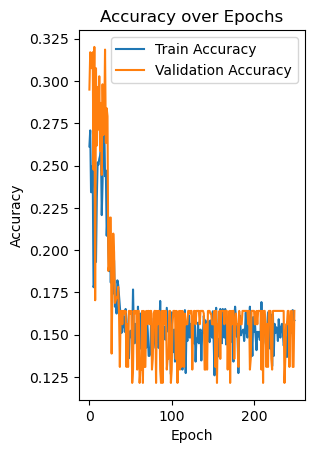

In [12]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [13]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

20/20 [==============================] - 0s 1ms/step - loss: 1.9472 - accuracy: 0.1640
Test Accuracy: 0.1640
